In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler

In [6]:
# Q1
cancer_data = pd.read_csv('data.csv')
cancer_data = cancer_data.loc[:,['diagnosis','radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean']]
cancer_data.head()
x_train,x_test,y_train,y_test = train_test_split(cancer_data.loc[:,['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean']],cancer_data['diagnosis'],test_size=0.2,random_state=777,stratify=cancer_data['diagnosis'])

In [15]:
# Q2
param = {'max_features':['sqrt','log2', 0.2, 0.5, 0.7, 3, 2, None]}

rf_model = RandomForestClassifier(random_state= 777)
grid = GridSearchCV(rf_model, param, cv = 7)
grid = grid.fit(x_train,y_train)


In [16]:
# Q 2.1 
grid.best_estimator_

RandomForestClassifier(max_features='sqrt', random_state=777)

##### Q 2.1 - From the above it can be seen that the m value of the square root of the total number of features gives the best performance


In [20]:
# Q 2.2 
list(zip(x_train.columns, grid.best_estimator_.feature_importances_))


[('radius_mean', 0.5104774958205661),
 ('texture_mean', 0.14404816824402633),
 ('smoothness_mean', 0.09680538521439813),
 ('compactness_mean', 0.24866895072100942)]

##### Q 2.2 The above list shows that radius mean is the most important input variable as it has the highest feature importance

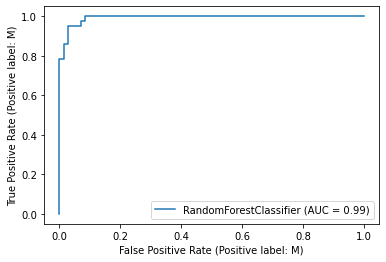

In [23]:
# Q 2.3 
plot_roc_curve(grid.best_estimator_,x_test,y_test.values.reshape(-1,1))

##### Q 2.3 The AUC using the Random Forest Classifier is 0.99

In [44]:
# Q3 
param = {'n_neighbors':range(1,10)}

KNNmodel = KNeighborsClassifier()
grid = GridSearchCV(KNNmodel, param, cv = 7)
grid = grid.fit(x_train,y_train)

In [45]:
# Q 3.1 
grid.best_estimator_

KNeighborsClassifier(n_neighbors=8)

##### Q 3.1 The number of neighbors that gives the best performance is 8.

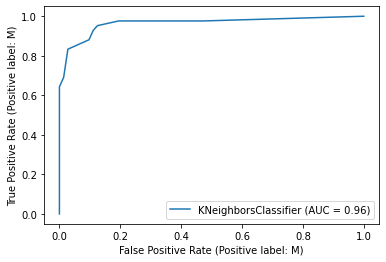

In [46]:
# Q 3.2 
y_pred = grid.best_estimator_.predict(x_test)
plot_roc_curve(grid.best_estimator_,x_test,y_test.values.reshape(-1,1))

##### Q 3.2 The AUC using the KNearestNeighbors Classifier is 0.96

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

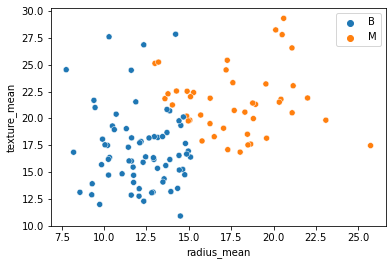

In [47]:
# Q 3.3 
sns.scatterplot(x = x_test['radius_mean'], y = x_test['texture_mean'], hue = y_pred)

In [41]:
# Q4
# Scaling data 
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


param = {'C':np.arange(1.0,101.0,1.0)}

SVCmodel = SVC(kernel='linear',random_state= 777)
grid = GridSearchCV(SVCmodel, param, cv = 10)
grid = grid.fit(x_train_scaled,y_train)


In [42]:
# Q 4.1
grid.best_estimator_

SVC(C=6.0, kernel='linear', random_state=777)

##### Q 4.1 The value of C that gives the best performance is 6.0 

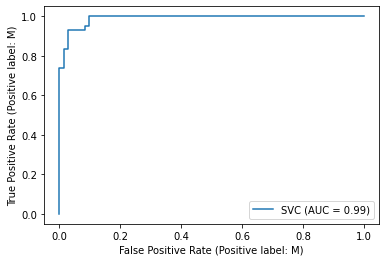

In [43]:
# Q 4.2 
plot_roc_curve(grid.best_estimator_,x_test_scaled,y_test.values.reshape(-1,1))

##### Q 4.2 The AUC using the SVM classifier is 0.99